In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.gridspec as gs
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression
import pandas as pd
import csv,os

In [12]:
# Données pour estimer l'orientation
pi=np.pi
H_set_o=np.r_[0.01,0.25,0.35,0.45,0.5,0.65,0.75,0.85,0.99]
delta_set_o=np.r_[pi/64,9*pi/128,pi/8,3*pi/16,pi/4,5*pi/16,3*pi/8,7*pi/16,pi/2]
alpha_set_o=np.r_[-pi/2,-pi/6,0,pi/4,pi/3]
alpha_set_str_o=np.array(['-$\\frac{\pi}{6}$','-$\\frac{\pi}{2}$','0','$\\frac{\pi}{4}$','$\\frac{\pi}{3}$'],str)
delta_set_str_o=np.array(['$\\frac{\pi}{64}$','$\\frac{9\pi}{128}$','$\\frac{\pi}{8}$',
'$\\frac{3\pi}{16}$','$\\frac{\pi}{4}$','$\\frac{5\pi}{16}$','$\\frac{3\pi}{8}$','$\\frac{7\pi}{16}$','$\\frac{\pi}{2}$'],str)


# Données pour estimer H et delta
theta1=pi/2
H_set=np.r_[0.01,0.15,0.25,0.35,0.45,0.5,0.65,0.75,0.85,0.99]
delta_set=np.r_[pi/64,9*pi/128,pi/8,3*pi/16,pi/4,5*pi/16,3*pi/8,7*pi/16,pi/2]

delta_set_str=np.array(['$\\frac{\pi}{64}$','$\\frac{9\pi}{128}$','$\\frac{\pi}{8}$',
'$\\frac{3\pi}{16}$','$\\frac{\pi}{4}$','$\\frac{5\pi}{16}$','$\\frac{3\pi}{8}$','$\\frac{7\pi}{16}$','$\\frac{\pi}{2}$'],str)


# Code de chargement du champ
def load_img_200_of(H,delta,index,alpha=None):
    '''
    H: Rugosite du champ
    delta: Demi-ouverture du cone frequentiel
    index: Numero d'une realisation du champ
    alpha: Orientation du champ'''

    if alpha!=None:# estimation de alpha
        image_name='H='+str(H)+'_delta='+str(delta)+'_alpha='+str(alpha)+'_nb='+str(index)# Nom de l'image depuis le fichier pour estimer alpha
        title='H='+str(H)+'_delta='+str(np.round(delta,2))+'_alpha='+str(np.round(alpha,2))      # Nom de l'image à l'affichage
        fil_dir_200='doc_images_py/diff_200_realisations_of_each_EF_H_alpha_delta/'  
    else:# estimation de H et delta
        image_name='H='+str(H)+'_delta='+str(delta)+'_alpha='+str(delta)+'_nb='+str(index)# Nom de l'image depuis le fichier pour estimer H et delta
        title='H='+str(H)+'_delta='+str(np.round(delta,2))+'_alpha='+str(np.round(delta,2))
        fil_dir_200='doc_images_py/diff_200_realisations_of_each_EF_H_delta/'

    img_gray=np.load(fil_dir_200+image_name +'.npy')
    return img_gray,title

# Taille des image
img_shape=(256,256)

(-0.5, 255.5, 255.5, -0.5)

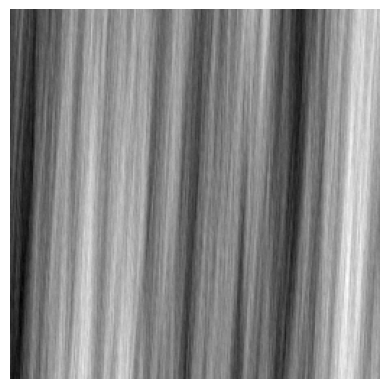

In [11]:
#################################### Chargement et affichage d'une l'image #######################################################
X,_=load_img_200_of(H=0.5,delta=pi/64,index=150)
plt.imshow(X,cmap='gray')
plt.axis('off')

In [7]:
######################## La transformée de Fourier du filtres F_l et H_l dans le domaine spectrale##############################
# c_n designe le coeffitient de normalisation fixé 0.014

def hat_F_l(img_shape,l,c_n=0.014):
    (M,N)=img_shape
    y=np.zeros((M,N))
    # Calcul des normes des arguments
    yy,xx=np.meshgrid(np.arange(-M//2,M//2),range(-N//2,N//2))  
    coord_norm=np.sqrt(xx**2+yy**2)
    # Calcul de la transformée de fourier de l'ondelette psi
    x=2**l*coord_norm*c_n
    a=(x<=pi)*(x>pi/4)
    y[a]=np.cos((pi/2)*np.log2(2*np.abs(x[a])/pi))
    return y

def hat_H_l(img_shape,l,c_n=0.014):
    (M,N)=img_shape
    y=np.zeros((M,N))
    # Calcul des normes des arguments
    yy,xx=np.meshgrid(np.arange(-M//2,M//2),range(-N//2,N//2))  
    coord_norm=np.sqrt(xx**2+yy**2)
    # Calcul de la transformee de fourier de l'ondelette
    x=2**l*coord_norm*c_n
    a=(x<=pi)*(x>pi/4)
    y[a]=np.cos((pi/2)*np.log2(2*np.abs(x[a])/pi)+pi)
    return y-y.min()

In [32]:
################### Affichage du filtre F_l et du filtre H_l dans le domaine spectrale aux echelles 1 et 2 #####################
def affiche_flters(img_shape,l=0):
    (M,N)=img_shape;l
    [W1,W2]=np.meshgrid(range(-M//2,M//2),range(-N//2,N//2))
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(221,projection='3d'); ax.plot_surface(W1,W2,hat_F_l(img_shape,l))
    ax.set_title('$|\hat{F}_{0}|$')
    ax=fig.add_subplot(222,projection='3d'); ax.plot_surface(W1,W2,hat_H_l(img_shape,l))
    ax.set_title('$|\hat{H}_{0}|$')
    ax=fig.add_subplot(223,projection='3d'); ax.plot_surface(W1,W2,hat_F_l(img_shape,l+1))
    ax.set_title('$|\hat{F}_{1}|$')
    ax=fig.add_subplot(224,projection='3d'); ax.plot_surface(W1,W2,hat_H_l(img_shape,l+1))
    ax.set_title('$|\hat{H}_{1}|$')
    fig.tight_layout(h_pad=5,w_pad=2)
    fig.savefig(fil_dir+'filtres')

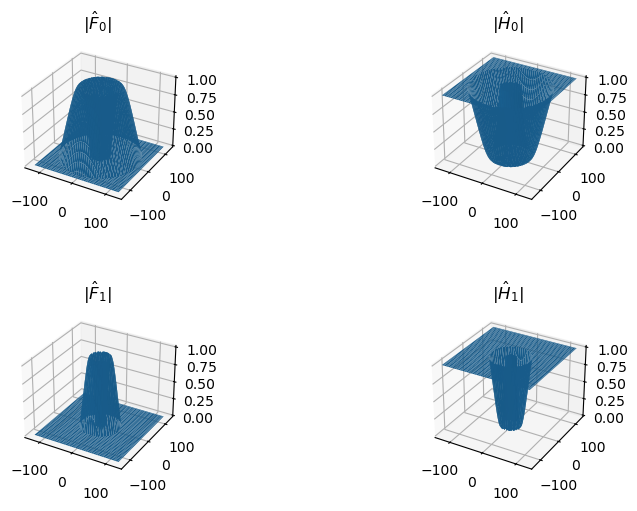

In [33]:
affiche_flters(img_shape,l=1)

In [13]:

def cor(X,l,c_n):
    '''
    X: Champ 2-D'\n'
    l: l'échelle'\n'
    c_n: Coefficient de normalisation'\n'
    '''
    ################################################### Construction de la transformée de Fourier de l'ondelette hat_psi ##################################
    M,N=X.shape
    hat_psi=np.zeros((M,N))
    # Calcul des normes des arguments
    xx,yy=np.meshgrid(np.arange(-M//2,M//2),range(-N//2,N//2))  
    arg_norm=np.sqrt(xx**2+yy**2)
    coord_norm=np.fft.ifftshift(arg_norm)

    # Calcul de la transformée de fouriée de psi
    x=coord_norm*c_n
    t=(x<=pi)*(x>pi/4)
    hat_psi[t]=np.cos((pi/2)*np.log2(2*np.abs(x[t])/pi))

    ######################## Construction de la transformée de Fourier de Riesz #######################################
    hat_X_ctred=np.fft.fftshift(np.fft.fft2(X))
    xy_0=np.argwhere(arg_norm==0)[0]                                            # Prevoir l'indetermination a l'origne avant l'inversion
    arg_norm[xy_0[0],xy_0[1]]=1
    inv_arg_norm=1/arg_norm
    inv_arg_norm[[xy_0[0],xy_0[1]]]=0                                           # Prevoir l'indetermination a l'origne apres l'inversion

    hat_R1=np.fft.ifftshift(-1j*xx*inv_arg_norm*hat_X_ctred)                    # Coordonnées de Riesz 1
    hat_R2=np.fft.ifftshift(-1j*yy*inv_arg_norm*hat_X_ctred)                    # Coordonnées de Riesz 1

    ################################### Construction des Pas de translation de l'ondelette ###############################
    k1,k2=np.meshgrid(range(M),range(N))                                        
    pas=k1%M+(k2%N)*M                                                           
    pas_hat_psi_lk=((2**l)*pas)%(N*M)

    ################################### Construction des coefficients d'ondelette de Riesz ################################
    hat_coef_1=-(2**l)*hat_R1.flatten()[pas]*hat_psi.flatten()[pas_hat_psi_lk]
    hat_coef_2=-(2**l)*hat_R2.flatten()[pas]*hat_psi.flatten()[pas_hat_psi_lk]
    coef_0=np.fft.ifft2(hat_coef_1.reshape(M,N)).real                            # Coefficints d'ondelette de Riesz 1
    coef_1=np.fft.ifft2(hat_coef_2.reshape(M,N)).real                            # Coefficints d'ondelette de Riesz 2
    return coef_0,coef_1

In [14]:
################################### Construction du tenseur de structure de Riesz empirique ###########################

def tsore(X,l,c_n=0.014,rate=75):
    '''
    X: Champ 2-D '\n'
    l: l'échelle'\n'
    c_n: Coefficient de normalisation '\n'
    rate: Nombre de lignes et colonnes suprimées sur les bords de la texture filtrée pour reduire les artéfacts'\n'
    '''
    
    M,N=X.shape
    coef_0,coef_1=cor(X,l,c_n,)
    cr0=coef_0[rate:-rate,rate:-rate];cr1=coef_1[rate:-rate,rate:-rate]             # Réduction des bords
    # Calcul des coefficients du tenseur de structure en ondelette Riesz empirique
    J_00=np.sum(cr0**2)
    J_01=J_10=np.sum(cr0*cr1)
    J_11=np.sum(cr1**2)
    t=np.array([[J_00,J_01],[J_10,J_11]])/(M*N)
    return t

In [15]:
X,_=load_img_200_of(H=0.25,delta=pi/8,index=125)
tsore(X,l=3,c_n=0.013,rate=75,)

array([[0.21080508, 0.07629946],
       [0.07629946, 0.08137747]])

5.2-1 a) *********************** **ESTIMATION DE LA RUGOSITE D'UN CHAMP ELEMENTAIRE** *****************************

In [10]:
################## Détermination de l'ordre d'autosimilarité d'un EF par la régression linéaire ####################
# Ce code retourne la valeur optimale de H. Il retourne egalement la representation des nuages de points correspondant à la serie de valeurs propres
# et l'ordonnee  a l'origne optimale pour fig==True

def H_estimator(X,nb_scale=5,cv=3,c_n=0.014,fig=False): 
    '''
    X: Champ 2-D '\n'
    nb_scale: Nombre d'échelle '\n'
    cv: Nombre de plits pour la validation croisée '\n'
    c_n: Constante de normalisation '\n'
    fig: Booléen. Si True, la droite de régression est présentée. False est la valeur par défaut '\n'
    '''
    scales=np.arange(1,nb_scale+1,dtype=int)
    y=np.zeros(len(scales),) # Somme des log2 de valeurs propres par echelle.
    
    for i,l in enumerate(scales):
        vals_p=np.linalg.eigvals(tsore(X,l=l,c_n=c_n))
        y[i]=np.log2(vals_p.sum())

    # Prepation des donnees pour la regression
    x=scales.reshape(-1,1)#np.arange(len(y)).reshape(-1,1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,shuffle=False)
    scoring='neg_root_mean_squared_error'# Choix de la mesure de performance

    # Entrainnement et ajustement du model
    Model=LinearRegression()
    result=cross_validate(Model,x_train,y_train,scoring=scoring,cv=cv,return_estimator=True)

    # Resultats des performances du model suivant les plits
    r=result['test_score'].round(3);n=np.argwhere(r==r.max())[0][0]
    p=result['estimator'][n]
    tild_H=p.coef_[0]/2-1 #estimateur de H
    tild_c=np.exp2(p.intercept_)#/tild_c_phi # estimateur l'intercept

    # Affichage de la droite de regression
    if fig==True:
        F,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
        F.tight_layout(h_pad=1,w_pad=2)
        
        ax.scatter(scales,y,c='r')#ax.scatter(scales,tab[:,1])
        ax.plot(x,p.predict(x),c='b',label='$\\tilde{H}$='+str(np.round(tild_H,3)),ls='--')
        ax.set_xlabel('echelle l')
        ax.set_ylabel('log2($\\bar{s_{l}}$)')
        ax.set_title("Estimation de l'indice de Hurst H")# pour H="+str(H)+" & $\delta$="+ delta_set_str[delta_set==delta][0])
        ax.legend()
        F.savefig(fil_dir+'Estimation_H_pour_un_ef')
        tild_H=tild_H,tild_c

    return tild_H

(0.5872737334686438, 6.364582853119258e-05)

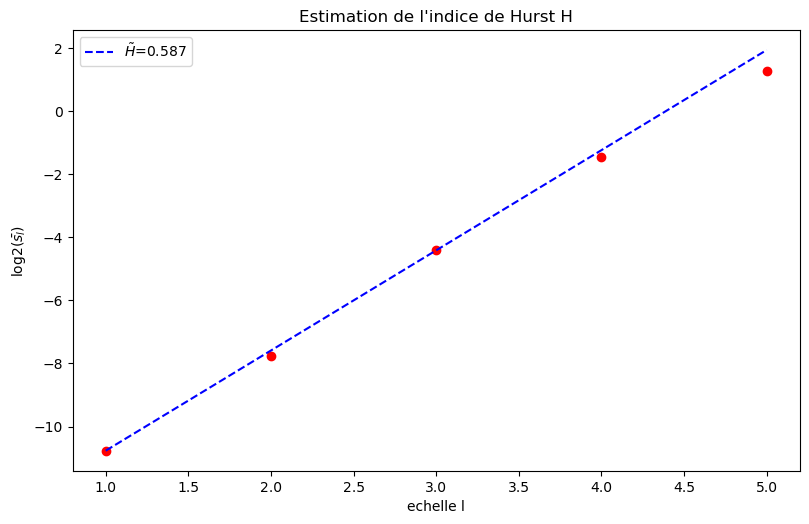

In [38]:
X,_=load_img_200_of(H=0.5,delta=pi/8,index=121)
H_estimator(X,nb_scale=5,cv=3,c_n=0.014,fig=True,)# 0.014;

In [11]:
##################################### Calcul de l'esperance de l'estimateur de H pour une valeur de delta #########################

def meanof_H_estimator(H,delta,nb_realst=25,nb_scale=5,cv=3,c_n=0.014):
    '''
    Entrées:\n'
    H: L'ordre d'autosimilarité théorique\n
    delta: Degré d'anistropie théorique\n
    nb_realst: Nombre de réalisation du champ\n
    nb_scale: Nombre d'échelle \n
    cv: Nombre de plits pour la validation croisée \n
    c_n: Constante de normalisation \n
    Sortie:\n'
    L'ordre d'autosimilarité moyen de la texture
    '''
    meanof_tild_H=0
    for index in range(nb_realst):
        X,_=load_img_200_of(H=H,delta=delta,index=index)
        h=H_estimator(X,nb_scale=nb_scale,cv=cv,c_n=c_n)
        meanof_tild_H+=h/nb_realst
    return meanof_tild_H
meanof_H_estimator(0.45,5*pi/16,nb_realst=25)

0.44658659510765863

In [12]:
### Illustration graphique de l'efficacité de l'estimateur de H pour differentes valeurs de delta.

def show_efficiencyof_H_estimator(nb_realst=25,nb_scale=5,cv=3):
    '''
    Entrées:\n'
    nb_realst: Nombre de réalisation du champ\n
    nb_scale: Nombre d'échelle \n
    cv: Nombre de plits pour la validation croisée \n
    Sortie:\n'
    Figure illustrative de l'éfficacité de l'estimateur à estimer, par sa moyenne, l'ordre d'autosimilarité des textures
    '''

    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    couleurs=[(1,0,0.5),'k','g','r','c','m','y','b','0.5',(0.95,0.5,1)]
    h=np.zeros((len(delta_set),))                                     
    for j,H in enumerate(H_set):
        for i,delta in enumerate(delta_set):
            h[i]=meanof_H_estimator(H,delta,nb_realst,nb_scale,cv)     # Calcul des valeurs moyennes estimées à chaque delta

        ax.plot(delta_set,h,c=couleurs[j])                            # Tracé de la valeur moyenne estimée de H en fonction de delta
        ax.axhline(H,label='H='+str(H),ls='--',c=couleurs[j])         # Tracé de la valeur cible H en fonction de delta
    ax.set_xticks(ticks=delta_set,labels=delta_set_str)
    ax.set_yticks(ticks=H_set,labels=H_set.astype(int))
    ax.set_title("Efficacité de de l'estimateur $\\tilde{H}$")
    ax.set_ylabel("Valeur cible")
    ax.set_xlabel("Degé d'anisotropie $\delta$")
    ax.legend()
    fig.savefig(fil_dir+'Val_moy_tild_H_LP')

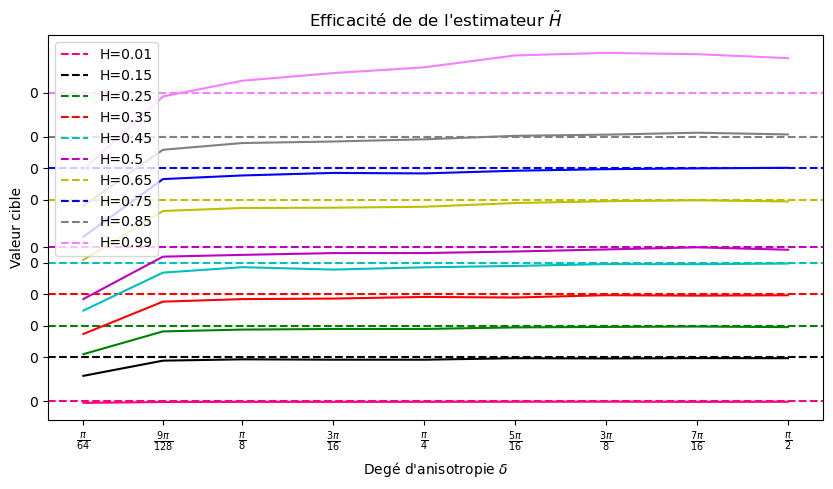

In [13]:
show_efficiencyof_H_estimator(nb_realst=200,nb_scale=5,cv=3)#25/15mn*******************2h

Cette figure illustre une estimation de l'indice de Hurst en fonction du degre d'anisotropie pour des champ de meme rugosite, caracterise par une couleur. 
Nous nous attendons a une valeur estimee constante pour les champs caracterise par la meme couleur.
- l'estimation est satisfaisante a l'exeption du degre d'anisotropie correspondant a pi/64.
- Ce mauvais resultat a ce niveau, est certainement du a une forte energie,dans le domaine frequentiel, de la texture filtree.

Afin de mieu comprendre ce mauvais resultat nous visualisons les effets de l'ondeltte sur deux resultats opposeses de degre d'anisotropie correspondants respectivement a pi/8 (estimation tres satisfaisante) et a pi/64 (estimation tres mauvaise)

**Effets de l'ondelette sur les champs de degre d'anisotropie differentes**

Ces images illustrent:

un mauvais filtrage ,par l'ondelette, de la texture du champ tres anisotrope(delta=<pi/64 et H3=35) sur son bord.Ce qui est a l'origine de la mauvaise estimation de l'indice Hurst. L'usage filtre pass-bas de l'ondelette a c_n=0.31 sensee couper les hautes frequences est inadapte pour le champ d'ouverture pi/32.
les champs tres anisotropes proches de la degeneraissance(H=<0.25) ont texture tres bien filtre par l'ondelette, certainement du a la tres faible variation d'energie dans le domaine frequentiel. Ce qui est a l'origine de la mailleur estimation de l'indice de Hurst.

In [16]:
# Calcul de la moyenne quadratiue(Mse) et de la variance empirique(ve)
def mse_ve_tild_H(nb_realst=25,nb_scale=5,cv=3):
    '''
    Entrées:\n'
    nb_realst: Nombre de réalisation du champ\n
    nb_scale: Nombre d'échelle \n
    cv: Nombre de plits pour la validation croisée \n
    Sortie:\n'
    Deux tableaux contenant respectivement les moyennes quadratiues et les variances empiriques de l'estimateur de l'ordre d'autosimilarité 
    pour chaque texture de paramètres théoriques H et delta
    '''
    
    MSE=np.zeros((len(H_set),len(delta_set)));VE=np.zeros((len(H_set),len(delta_set)))
    
    for i,H in enumerate(H_set):
        for j,delta in enumerate(delta_set):
            mean=meanof_H_estimator(H,delta,nb_realst,nb_scale,cv,c_n)           # Calcule de  de lesperance de l'estimateur(moyenne empirique de tild_H)
            ve=0;mse=0
            for index in range(nb_realst):
                X,_=load_img_200_of(H=H,delta=delta,index=index)
                tild_H=H_estimator(X)                                   # Calcul d'une valeur de H estimée
                ve+=(tild_H-mean)**2/nb_realst                              # Calcul de la variance empirique
                mse+=(tild_H-H)**2/nb_realst                                # Calcul de l'erreur moyenne quadratique

            MSE[i,j]=mse;VE[i,j]=ve
        
    return  pd.DataFrame(MSE,index=H_set,columns=delta_set_str),pd.DataFrame(VE,index=H_set,columns=delta_set_str)

In [ ]:
MSE,VAR=mse_ve_tild_H(nb_realst=200)# 10/11mn ******************** 3,67h

5.2-1 b) ****** **ESTIMATION DE L'INDICE DE D'UN CHAMP ELEMENTAIRE SUIVANT L'ECHELLE** ***********************

In [17]:
######## Calcul de la moyenne empirique de l'estimateur de l'indice de cohérence par échelle pour une valeur de H

def meanof_constcy_estimator_per_scale(H,delta,nb_realst=200,nb_scale=5,c_n=0.014):
    '''
    Entrées:\n'
    H: L'ordre d'autosimilarité théorique\n
    delta: Degré d'anisotropie théorique\n
    nb_realst: Nombre de réalisation du champ\n
    nb_scale: Nombre d'échelle \n
    c_n: Constante de normalisation \n
    Sortie:\n'
    Tableau contenant l'indice de cohérence moyen des textures de la base de donnée 
    '''
    scales=np.arange(1,nb_scale+1,dtype=int)
    meanof_ic_per_scale=np.zeros(nb_scale,)  # moyenne de l'estimateur de l'indice de coherence par echelle
    
    for i,l in enumerate(scales):
        for index in range(nb_realst):
            X,_=load_img_200_of(H=H,delta=delta,index=index)
            vals_p=np.linalg.eigvals(tsore(X,l=l,c_n=c_n))
            meanof_ic_per_scale[i]+=((vals_p.max()-vals_p.min())/vals_p.sum())/nb_realst                   
    return meanof_ic_per_scale

meanof_constcy_estimator_per_scale(0.5,delta=pi/64,nb_realst=1,nb_scale=5,c_n=0.014)

array([0.92007508, 0.92532263, 0.97465444, 0.92512572, 0.95279586])

In [18]:
## Comparaison graphique de la moyennes empirique de l'estimateurs de l'indice de chérence à la valeur cible à chaque échelle.

def compare_meanof_constcy_estimator_to_constcy(H,nb_realst=24,c_n=0.014,nb_scale=5,best_scale=None):
    '''
    Entrées:\n'
    H: L'ordre d'autosimilarité des textures
    nb_realst: Nombre de réalisation du champ\n
    nb_scale: Nombre d'échelles \n
    best_scale: L'échelle adéquate \n
    Sortie:\n'
    Figure comparant l'estimateur moyen de l'indice de cohérence à sa valeur cible
    '''
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    couleurs=[(1,0,0.5),'k','g','r','c','m','y','b','0.5','0.95']
    scales=np.arange(1,nb_scale+1)
    #meanof_ic_per_scale=np.zeros(nb_scale,)
    for i,delta in enumerate(zip(delta_set,delta_set_str)):
        meanof_ic_per_scale=0
        meanof_ic_per_scale=meanof_constcy_estimator_per_scale(H,delta[0],nb_realst,nb_scale,c_n)            # Calcul de la moyennes empirique de l'estimateurs de l'indice de chérence      
        ax.plot(scales,meanof_ic_per_scale,c=couleurs[i])                                               # Tracé de la moyenne empirique de l'estimateur de l'indice de cohérence
        ax.axhline(np.sin(2*delta[0])/(2*delta[0]),label='$\delta$='+delta[1],ls='--',c=couleurs[i])    # Tracé de l'indice de cohérence cible
        if best_scale!=None:
            ax.scatter(best_scale,meanof_ic_per_scale[best_scale-1],c='k')                              # marquage de l'échelle adéquate
    ax.set_title("Comparaison de l'indice de cohérence moyen à la cible pour H="+str(H))
    ax.set_xlabel("Échelle")
    ax.set_ylabel("Indice de cohérence cible")
    ax.legend()

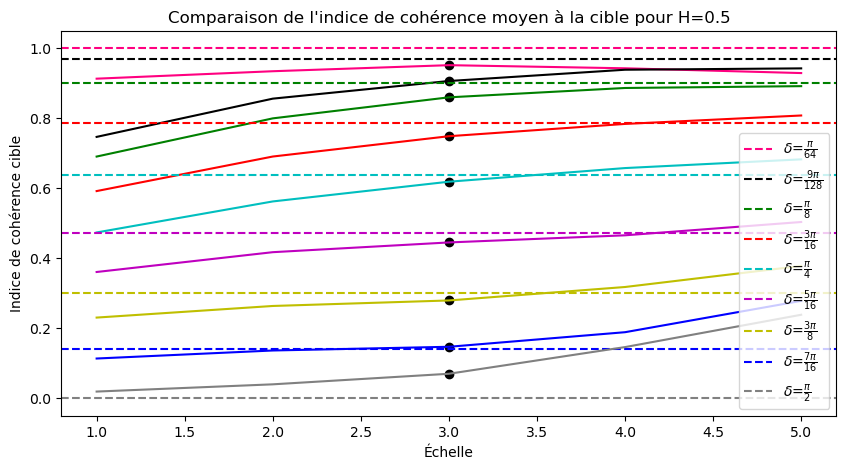

In [ ]:
compare_meanof_constcy_estimator_to_constcy(H=0.5,nb_realst=25,c_n=0.014,nb_scale=5,best_scale=3)

In [19]:
# Visualisation de la capacité de l'estimateur moyen de l'indice de chérence en foncion de delta à l'échelle 3 pour 
# différentes valeurs de H.

def show_efficiencyof_constcy_estimator_by_H(nb_realst,l=3):
    '''
    Entrées:\n'
    nb_realst: Nombre de réalisation du champ\n
    l: Échelle adequate\n
    Sortie:\n'
    Figure illustrative de l'éfficacité de l'estimateur à estimer, par sa moyenne, l'indice de cohérence des textures
    '''

    couleurs=[(1,0.75,0.5),'0.35','g','r','c','m','y','b','0.5',(0.25,0.25,0.5)]
    
    for j,H in enumerate(H_set):
        meanof_ic_per_delta=np.zeros(len(delta_set),)
        for i,delta in enumerate(delta_set):
            for index in range(nb_realst):
                X,_=load_img_200_of(H=H,delta=delta,index=index) # Chargement du champ 
                vals_p=np.linalg.eigvals(tsore(X,l=3))
                meanof_ic_per_delta[i]+=((vals_p.max()-vals_p.min())/vals_p.sum())/nb_realst # Calcul de l'estimateur moyen de l'indice de chérence à chaque  delta
            
        plt.plot(delta_set,meanof_ic_per_delta,label='H='+str(H),c=couleurs[j]) # Tracé de l'indice de l'estimateur moyen de l'indice de chérence pour chaque H
    plt.xticks(ticks=delta_set,labels=delta_set_str)
    plt.title("Illustration de l'efficacité de l'estimateur de l'indice de coherence à l'echelle l="+str(l))
    plt.xlabel("Degré d'anisotropie $\\delta$")
    plt.ylabel("Indice de coherence cible")
    plt.legend()

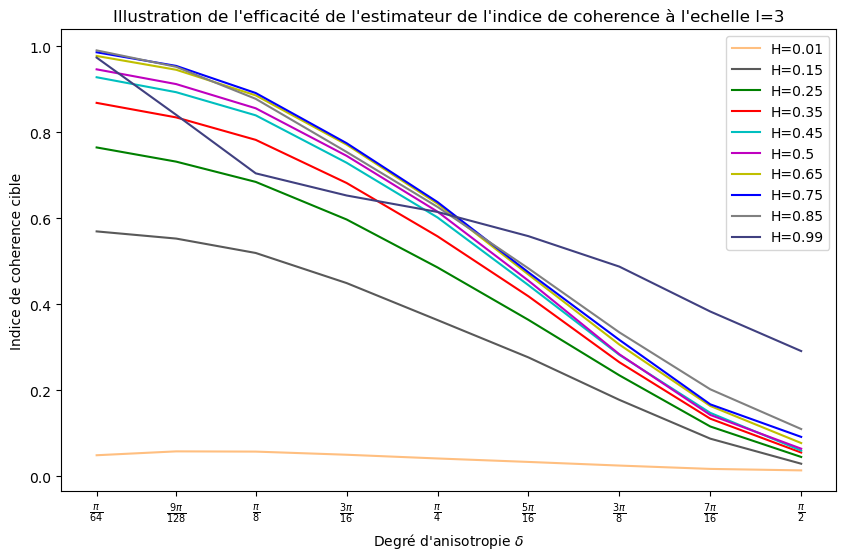

In [ ]:
plt.figure(figsize=(10,6))
show_efficiencyof_constcy_estimator_by_H(nb_realst=200,l=3)

5.3 a) ****************** **ESTIMATIMATION DE L'ORIENTATION DOMINANTE D'UN CHAMP ELEMENTAIRE** **********************

In [20]:
def alpha_estimator(X,l=3,c_n=0.014):
        '''
    Entrées:\n'
    X: Champ 2-D \n
    c_n: Constante de normalisation \n
    l: Échelle adéquate\n
    Sortie:\n'
    Orientation empirique du champ 2-D
    '''
        val_p,vect_p=np.linalg.eig(tsore(X,l,c_n))
        vect_p_max=vect_p[:,np.argmax(val_p)]
        return np.arctan(vect_p_max[1]/vect_p_max[0]) 

In [21]:
X,_=load_img_200_of(H=0.5,delta=5*pi/16,alpha=0.0,index=98)
alpha_estimator(X,l=3,c_n=0.014)

0.07425703343929697

In [22]:
# Visualisation de l'histogramme empirique des orientations locales d'un champ élémentaire et son orientation empirique. 

def show_OE_emphists_OL(X,title=None,c_n=0.014,l=3):
    '''
    Entrées:\n'
    X: Champ 2-D \n
    title: Nom du champ. La valeur par défaut est "None" \n
    c_n: Constante de normalisation \n
    l: Échelle adéquate\n
    Sortie:\n'
    Histogramme empirique des orientations locales de la textue du champ et son orientation empirique
    '''
    fig=plt.figure(figsize=(10,4))
    
    cr1,cr2=cor(X,l,c_n)                      
    orientations=np.arctan2(cr2,cr1).flatten()                                      # Calcul des orientations locales  empiriques du champ
        
    #val_p,vect_p=np.linalg.eig(tsore(X,l))
    #vect_p_max=vect_p[:,np.argmax(val_p)]
    orientation_emp=alpha_estimator(X,l,c_n)#np.arctan(vect_p_max[1]/vect_p_max[0])                           # Calcul de l'orientation empirique du champ

    # Affichage du champ
    ax=fig.add_subplot(1,2,1)
    ax.set_title(title)
    ax.imshow(X,cmap='gray')
    ax.set_axis_off()
    ax=fig.add_subplot(1,2,2)
    ax.set_title('Histogramme empirique des Orientations'); plt.hist(orientations,bins=50,density=True) # Tracé de l'histogramme empirique des orientations
    ax.axvline(orientation_emp,c='r',label='orientation empirique: '+str(np.round(orientation_emp,2))) # Tracé de l'orientation empirique
    ax.legend()
    fig.tight_layout(h_pad=1,w_pad=1)

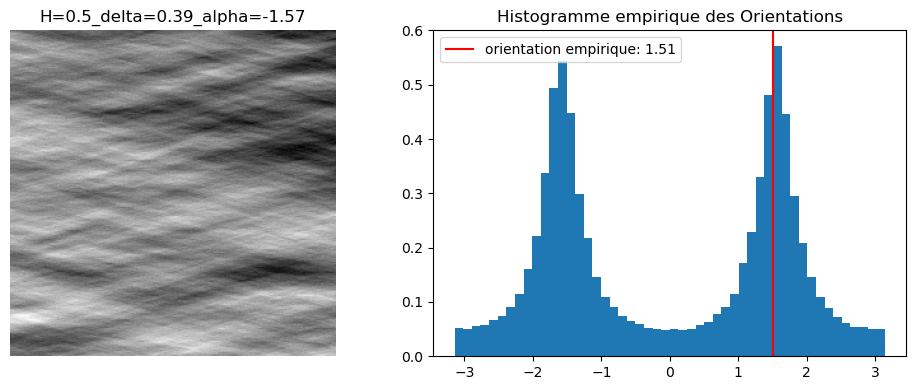

In [23]:
X,title=load_img_200_of(H=0.5,delta=pi/8,alpha=-pi/2,index=10)  
show_OE_emphists_OL(X,title=title,)

<Figure size 640x480 with 0 Axes>

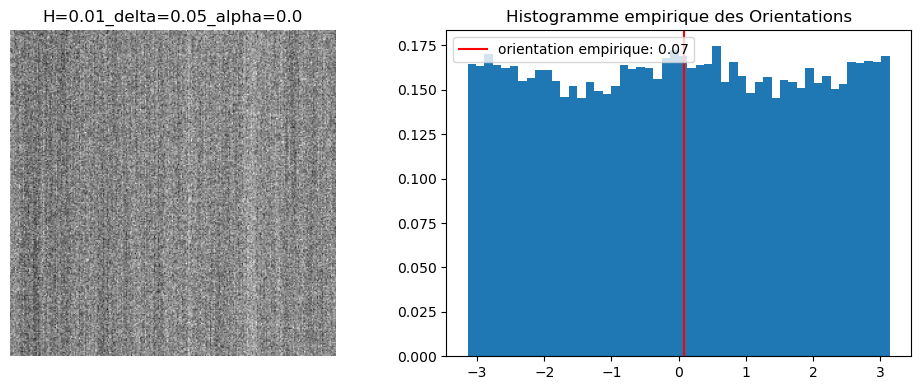

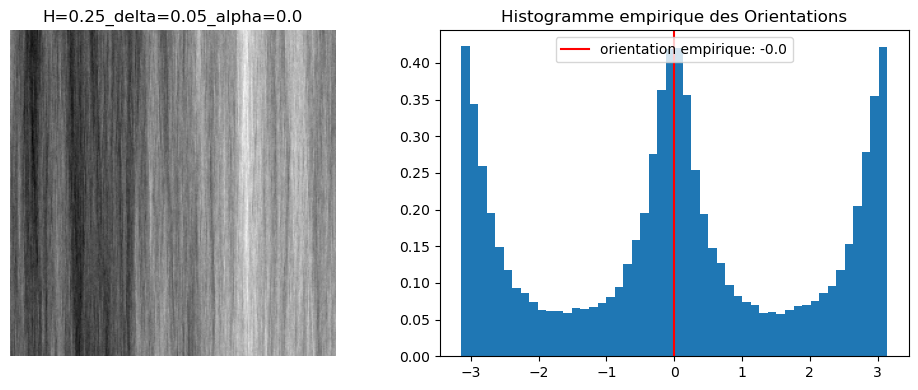

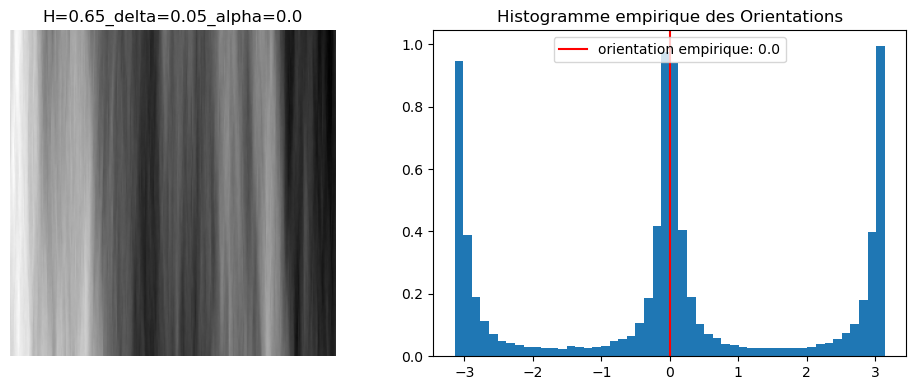

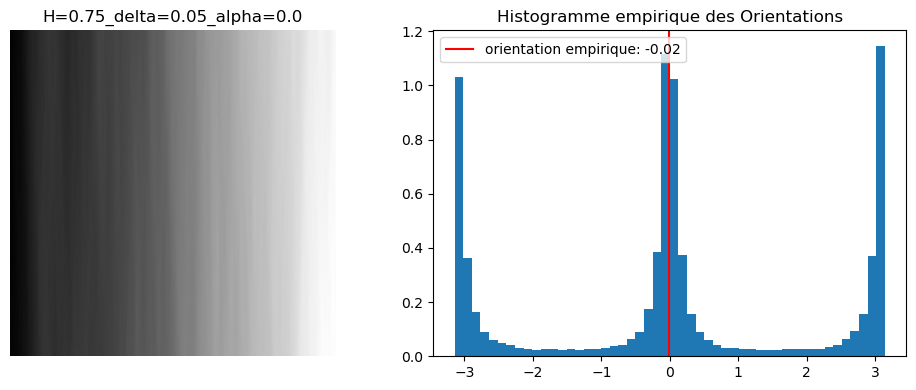

In [87]:
plt.figure()
for H in [0.01,0.25,0.65,0.75]:
    X,title=load_img_200_of(H=H,delta=pi/64,alpha=0.0,index=0)
    show_OE_emphists_OL(X,title=title)

In [22]:
##################################### Calcul de l'esperance de l'estimateur de alpha pour une valeur de delta #########################
def meanof_alpha_estimator(H=0.5,delta=pi/64,alpha=0.0,nb_realst=25,l=3,c_n=0.014):
    '''
    Entrées:\n'
    H: L'ordre d'autosimilarité théorique\n
    delta: Degré d'anistropie théorique\n
    nb_realst: Nombre de réalisation du champ\n
    l: L'échelle \n
    c_n: Constante de normalisation \n
    Sortie:\n'
    L'orientation moyenne de la texture
    '''
    mean=0
    for index in range(nb_realst):
        X,_=load_img_200_of(H=H,delta=delta,alpha=alpha,index=index)
        mean+=alpha_estimator(X,l,c_n)/nb_realst   # Calcul de l'orientation empirique moyenne pour une valeur de H et delta
    return mean

meanof_alpha_estimator(H=0.5,delta=pi/64,alpha=-pi/2,nb_realst=25,l=3,c_n=0.014)

-0.31336997192387633

In [24]:
############################# Illustration graphique de l'efficacité de estimateur de alpha en fonction delta du champ EF ##################################
def show_efficiencyof_alpha_estimator_per_H(delta,nb_realst,c_n=0.014,l=3):
    '''
    Entrées:\n'
    delta: Le degré d'anisotropie des textures
    nb_realst: Nombre de réalisation du champ\n
    c_n: Constante de normalisation \n
    l: Éclhelle adéquate\n
    Sortie:\n'
    Figure illustrative de l'éfficacité de l'estimateur à estimer, par sa moyenne, l'orientation des textures
    '''
    #plt.figure(figsize=(5,3),dpi=100)
    couleurs=[(0.25,1,0.7),'0.35','g','r','c','m','y','b',(1,0.25,0.7),(0.5,0.7,1)]
    H_set_=H_set_o[1:7]
    for i,alpha_i in enumerate(alpha_set_o):
        mean_emp_orit_alpha=np.zeros((len(H_set_),))
        for j,H in enumerate(H_set_):
            mean_emp_orit_alpha[j]=meanof_alpha_estimator(H,delta,alpha_i,nb_realst,l=l,c_n=c_n)# Calcul de l'orientation empirique moyenne pour une valeur de H
        plt.axhline(alpha_i,ls='--',c=couleurs[i])                                              # Tracé de l'orientation du champ en fonction de H
        plt.plot(H_set_,mean_emp_orit_alpha,ls='-',label='$\\tilde{{\\alpha}_{0,3}}$('+alpha_set_str_o[i]+')',c=couleurs[i]) # Tracé de l'estimateur en fonction de H
    plt.xticks(H_set_,H_set_.astype(str),rotation=45)
    plt.xlabel('Indice de rugosité H')
    plt.yticks(alpha_set_o,alpha_set_str_o)
    plt.ylabel('Orientation cible')
    plt.title("Efficacité de l'estimateur pour $\\delta$="+delta_set_str_o[delta_set_o==delta][0])
    plt.legend(loc="upper left")
    plt.tight_layout()

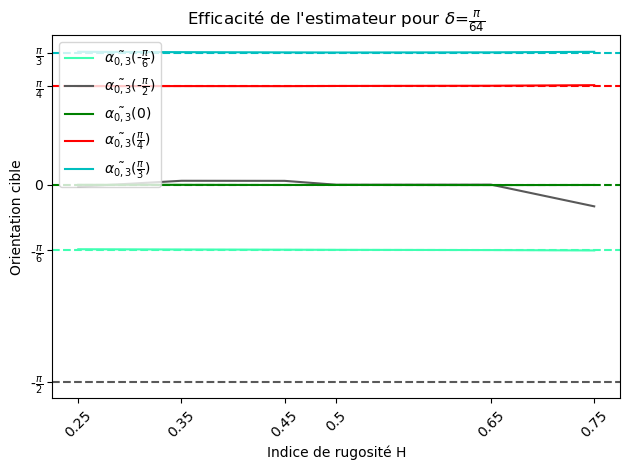

In [24]:
show_efficiencyof_alpha_estimator_per_H(pi/64,nb_realst=200,c_n=0.014,l=3)

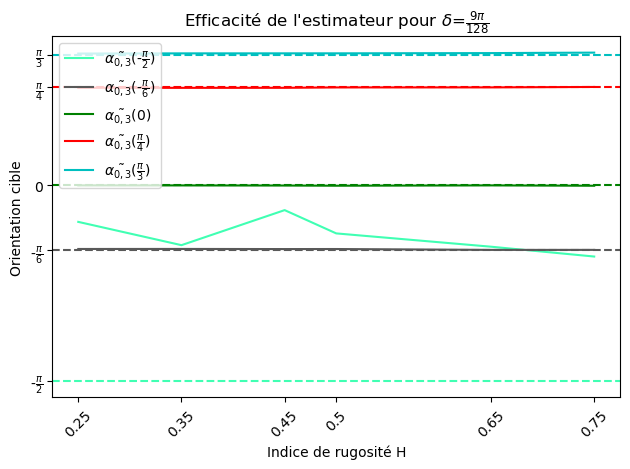

In [ ]:
show_efficiencyof_alpha_estimator_per_H(9*pi/128,nb_realst=200,c_n=0.014,l=3)

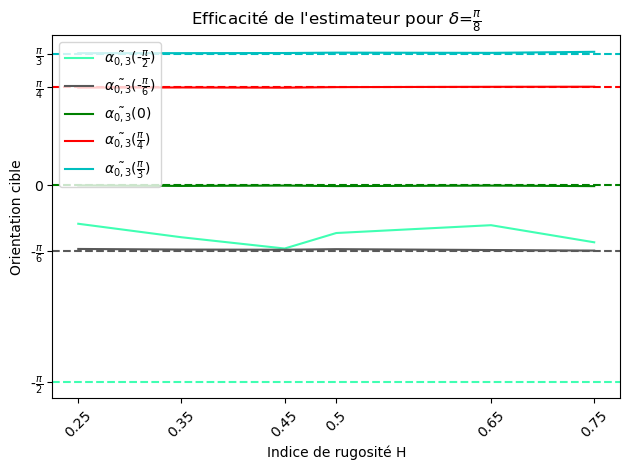

In [ ]:
show_efficiencyof_alpha_estimator_per_H(pi/8,nb_realst=200,c_n=0.014,l=3)

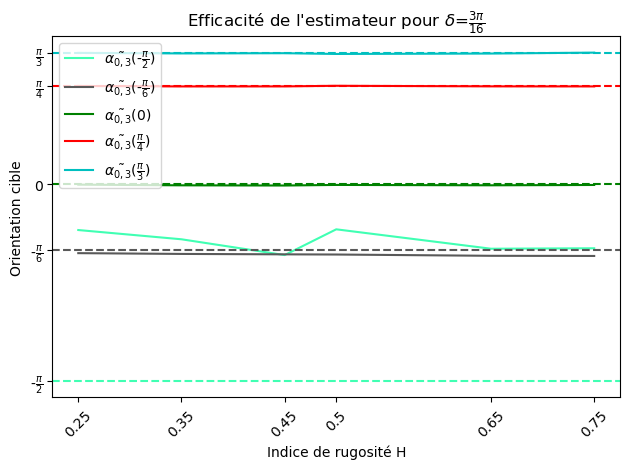

In [ ]:
show_efficiencyof_alpha_estimator_per_H(3*pi/16,nb_realst=200,c_n=0.014,l=3)

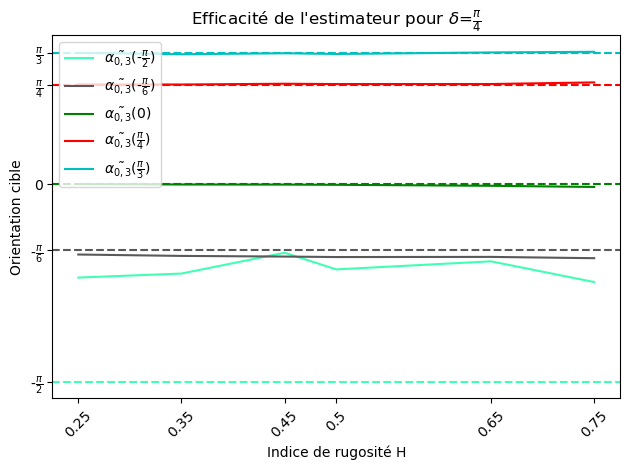

In [ ]:
show_efficiencyof_alpha_estimator_per_H(pi/4,nb_realst=200,c_n=0.014,l=3)

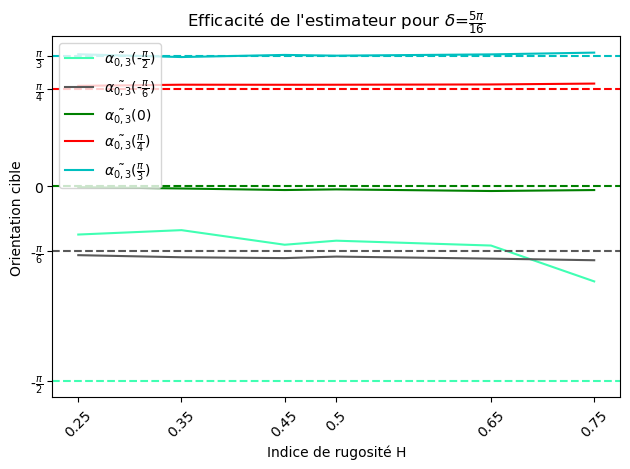

In [ ]:
show_efficiencyof_alpha_estimator_per_H(5*pi/16,nb_realst=200,c_n=0.014,l=3)

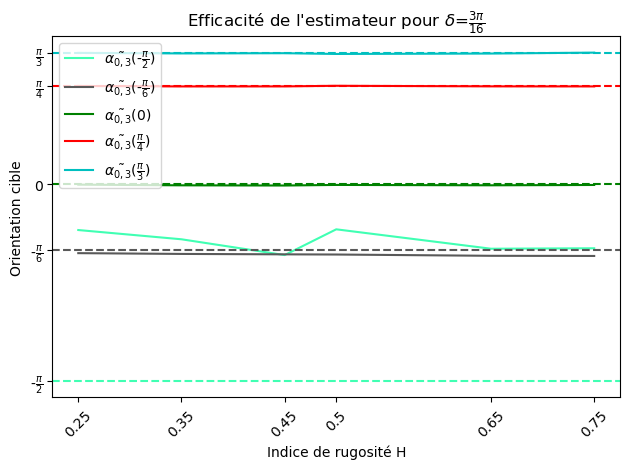

In [ ]:
show_efficiencyof_alpha_estimator_per_H(3*pi/16,nb_realst=200,c_n=0.014,l=3)

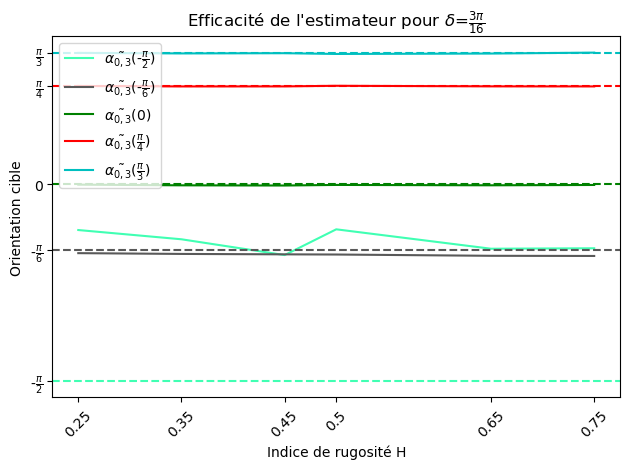

In [ ]:
show_efficiencyof_alpha_estimator_per_H(3*pi/16,nb_realst=200,c_n=0.014,l=3)

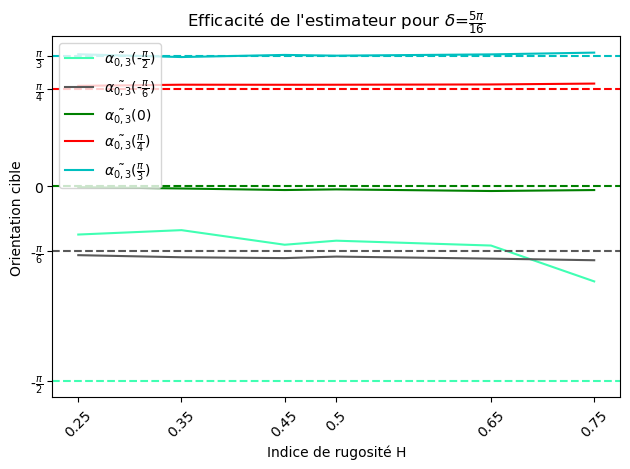

In [ ]:
show_efficiencyof_alpha_estimator_per_H(5*pi/16,nb_realst=200,c_n=0.014,l=3)

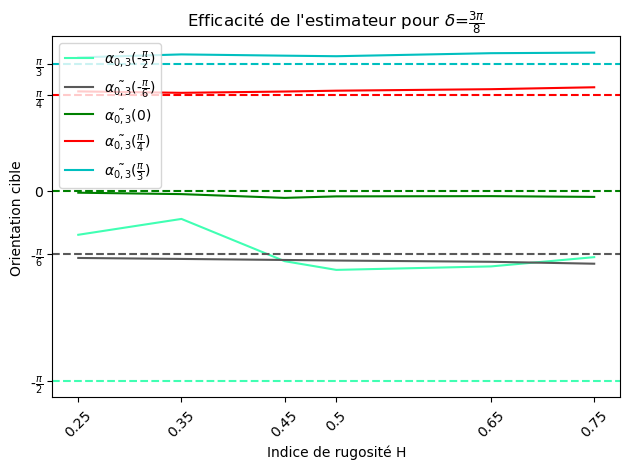

In [ ]:
show_efficiencyof_alpha_estimator_per_H(3*pi/8,nb_realst=200,c_n=0.014,l=3)

In [16]:
# Calcul de la moyenne quadratiue(Mse) et de la variance empirique(ve) de l'estimateur de l'orientation
def mse_ve_alpha_estimator(H,nb_realst=25,n=7):
    '''
    Entrées:\n'
    nb_realst: Nombre de réalisation du champ\n
    l: échelle \n
    n:\n
    
    Sortie:\n'
    Deux tableaux contenant respectivement les moyennes quadratiues et les variances empiriques de l'estimateur de l'ordre d'autosimilarité 
    pour chaque texture de paramètres théoriques H et delta
    '''
    
    MSE=np.zeros((len(alpha_set_o),len(delta_set_o[:n])));VE=np.zeros((len(alpha_set_o),len(delta_set_o[:n])))
    
    for i,alpha_i in enumerate(alpha_set_o):
        for j,delta in enumerate(delta_set_o[:n]):
            mean=meanof_alpha_estimator(H,delta,alpha_i,nb_realst)       # Calcule de  de lesperance de l'estimateur(moyenne empirique des orientations empiriques)
            ve=0;mse=0
            for index in range(nb_realst):
                X,_=load_img_200_of(H=H,delta=delta,alpha=alpha_i,index=index)
                tild_alpha=alpha_estimator(X)                                   # Calcul d'une valeur de alpha estimée
                ve+=(tild_alpha-mean)**2/nb_realst                              # Calcul de la variance empirique
                mse+=(tild_alpha-alpha_i)**2/nb_realst                                # Calcul de l'erreur moyenne quadratique

            MSE[i,j]=mse;VE[i,j]=ve
        
    return  pd.DataFrame(MSE,index=alpha_set_str_o,columns=delta_set_str_o[:n]),pd.DataFrame(VE,index=alpha_set_str_o,columns=delta_set_str_o[:n])

In [ ]:
MSE,VAR=mse_ve_alpha_estimator(H=0.5,nb_realst=200,n=7)# 25/3,16mn ******************** 24,8mn